In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import biom
from biom import load_table
%matplotlib inline
import scipy
from scipy import stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import plotly.express as px

## Import and reformat data

In [2]:
# Import data
smds = pd.read_csv('T1_SMDS_metadata_ms.txt', sep='\t', index_col=0)
srs = pd.read_csv('T4_SRS_metadata_ms.txt', sep='\t', index_col=0)

In [7]:
# Merge on shared columns
meta = pd.concat([smds, srs], join='inner')

In [14]:
# rearrange table to have raw / PMA treated of each sample in same row
raw = meta[meta['processing']=='raw'][['FC_avg_cells_per_ul','saliva_sample_ID']]
raw.columns=['raw_FC_avg_cells_per_ul','saliva_sample_ID']
pma = pma.rename(index=str, columns={'FC_avg_cells_per_ul':'pma_FC_avg_cells_per_ul'})
pair = pd.merge(raw, pma, left_on='saliva_sample_ID', right_on='saliva_sample_ID')

In [15]:
# calculate final percent glycerol 
#2 mL of 40% glycerol was in each tube that was then drooled on
pair['perc_glycerol'] = (2 / (pair['saliva_volume_mL_collected_in_5_min'] + 2)) *0.4
# calculate percent live cells
pair['percent_live'] = pair['pma_FC_avg_cells_per_ul'] / pair['raw_FC_avg_cells_per_ul']

## Plot final percentage glycerol by percentage live cells

[Text(0, 0.5, 'final % glycerol')]

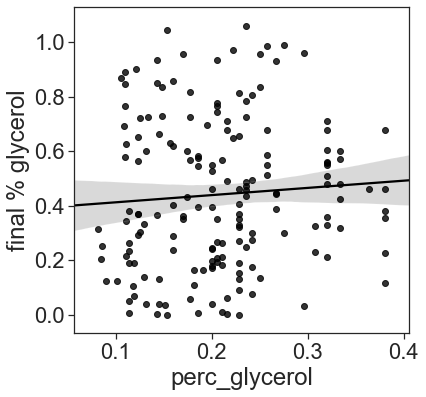

In [17]:
# plot percentage live cells by percentage glycerol
sns.set(font_scale=2)
sns.set_style('ticks')
fig = plt.figure()
ax = sns.regplot(x='perc_glycerol', y='percent_live', data=pair, color="black")
ax.figure.set_size_inches(6, 6)
ax.set(ylabel='% live cells')
ax.set(ylabel='final % glycerol')

## Stats time

In [19]:
# what is the minimum and maximum final percent glycerol?
print('min %glycerol:', pair['perc_glycerol'].min())
print('max %glycerol:', pair['perc_glycerol'].max())

min %glycerol: 0.08163265306122448
max %glycerol: 0.38095238095238093


In [19]:
# pearson correlation
pair.dropna(subset=['perc_glycerol','percent_live'], inplace=True)
stats.pearsonr(pair['perc_glycerol'], pair['percent_live'])

(0.07055102081549604, 0.35916843511288504)